In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Dataset

Dataset link: [Student performance dataset](https://www.kaggle.com/datasets/devansodariya/student-performance-data)


In [2]:
df = pd.read_csv('student_data.csv')

### Basic dataset info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Checking for missing data

In [5]:
df.isnull().any()

,0
school,False
sex,False
age,False
address,False
famsize,False
Pstatus,False
Medu,False
Fedu,False
Mjob,False
Fjob,False


### Checking for duplicates

In [6]:
df.duplicated().sum()

0

### Checking unique values per column

In [7]:
df.nunique()

,0
school,2
sex,2
age,8
address,2
famsize,2
Pstatus,2
Medu,5
Fedu,5
Mjob,5
Fjob,5


In [8]:
for column in df.columns:
    print(f"Unique values in '{column}': {df[column].unique()}")

Unique values in 'school': ['GP' 'MS']
Unique values in 'sex': ['F' 'M']
Unique values in 'age': [18 17 15 16 19 22 20 21]
Unique values in 'address': ['U' 'R']
Unique values in 'famsize': ['GT3' 'LE3']
Unique values in 'Pstatus': ['A' 'T']
Unique values in 'Medu': [4 1 3 2 0]
Unique values in 'Fedu': [4 1 2 3 0]
Unique values in 'Mjob': ['at_home' 'health' 'other' 'services' 'teacher']
Unique values in 'Fjob': ['teacher' 'other' 'services' 'health' 'at_home']
Unique values in 'reason': ['course' 'other' 'home' 'reputation']
Unique values in 'guardian': ['mother' 'father' 'other']
Unique values in 'traveltime': [2 1 3 4]
Unique values in 'studytime': [2 3 1 4]
Unique values in 'failures': [0 3 2 1]
Unique values in 'schoolsup': ['yes' 'no']
Unique values in 'famsup': ['no' 'yes']
Unique values in 'paid': ['no' 'yes']
Unique values in 'activities': ['no' 'yes']
Unique values in 'nursery': ['yes' 'no']
Unique values in 'higher': ['yes' 'no']
Unique values in 'internet': ['no' 'yes']
Uniq

### Dataset statistics

In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Distributions of some numerical features

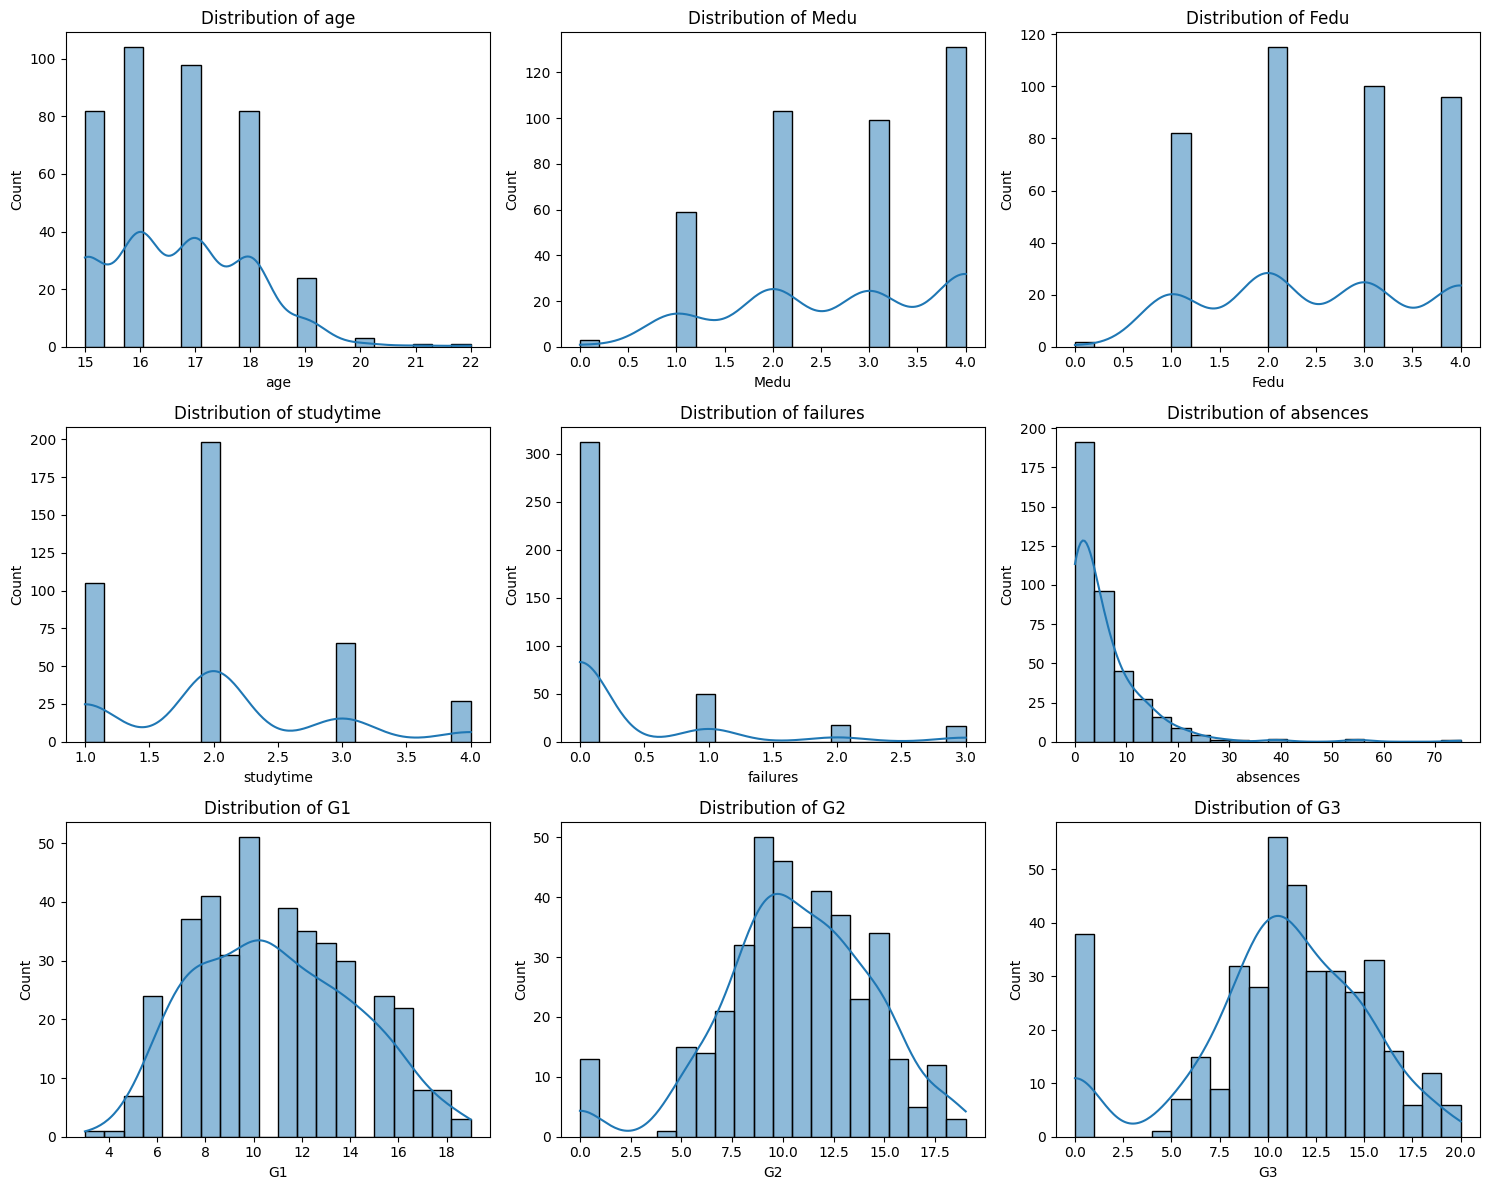

In [10]:
numerical_features = ["age", "Medu", "Fedu", "studytime", "failures", "absences", "G1", "G2", "G3"]

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

### Correlation analysis

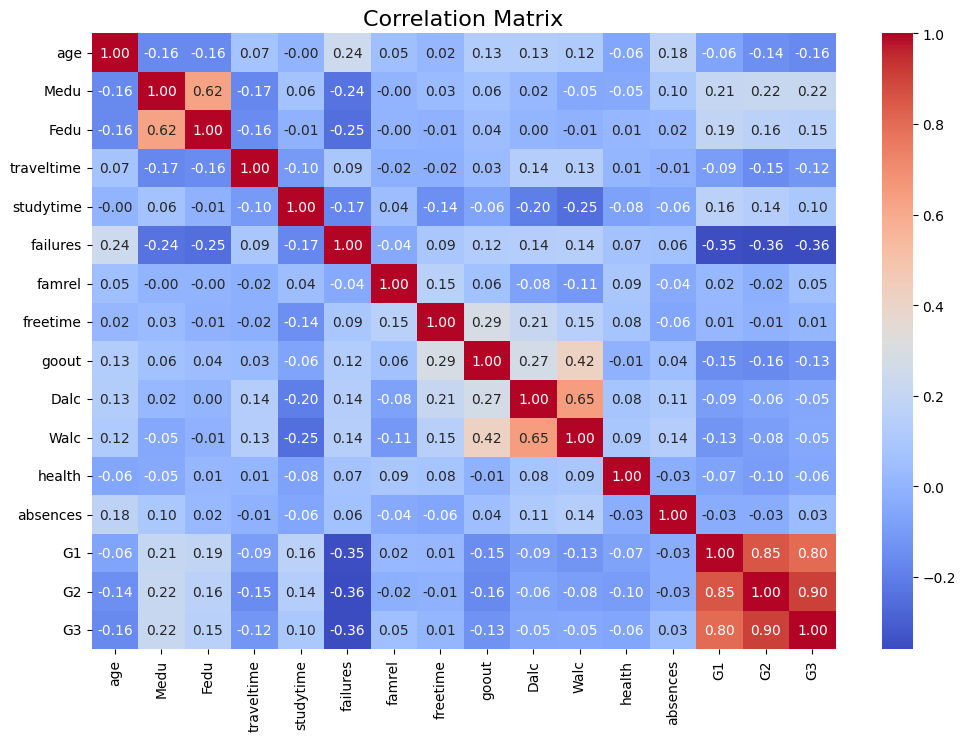

In [11]:
# selecting only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', fmt='.2f', annot=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

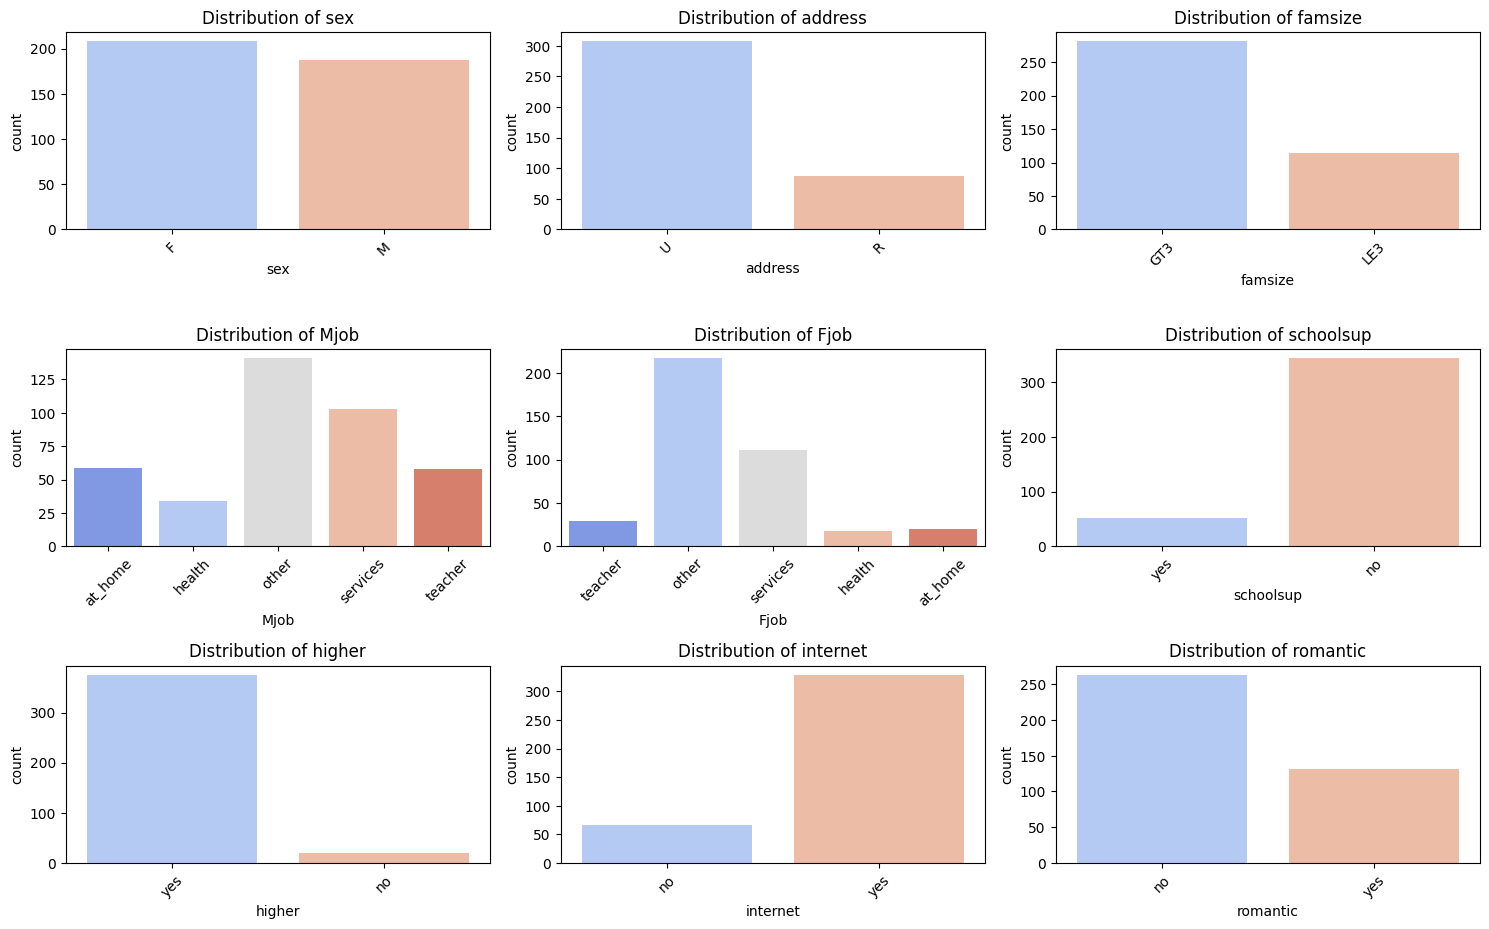

In [12]:
selected_categorical_features = ["sex", "address", "famsize", "Mjob", "Fjob", "schoolsup", "higher", "internet", "romantic"]

num_features = len(selected_categorical_features)
rows = (num_features // 3) + 1
plt.figure(figsize=(15, rows * 3))
for i, feature in enumerate(selected_categorical_features, 1):
    plt.subplot(rows, 3, i)  # arranging plots in 3 columns
    sns.countplot(data=df, x=feature, hue=feature, palette="coolwarm")
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()